# <a> Projeto 1 - Previsão de Vendas com Regressão Linear <a>
    
   Objetivos
    
    
Gerar dados simulados realistas para vendas de uma empresa (com variáveis que impactam vendas)

Realizar Análise Exploratória de Dados (EDA)

Preparar os dados para modelagem

Treinar um modelo de Regressão Linear para prever vendas futuras

Avaliar o modelo com métricas adequadas

Salvar o resultado para possível exportação a Power BI 

### Passo 1 — Gerar Dados Simulados


Vou criar uma base de dados fictícia com estas colunas (exemplo):

Marketing_Invest: investimento mensal em marketing (em milhares)

Preço_Produto: preço do produto no mês

Concorrência_Promo: número de promoções feitas por concorrentes

Vendas: quantidade vendida (nossa variável alvo)

In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gerando os dados

np.random.seed(42)  # para resultados reproduzíveis

# Criar 36 meses (3 anos)
meses = np.arange(1, 37)

# Gerar variáveis independentes
marketing_invest = np.random.normal(20, 5, size=36)  # média 20k, desvio 5k
preco_produto = np.random.normal(150, 10, size=36)   # média R$150, desvio R$10
concorrencia_promo = np.random.poisson(3, size=36)   # média 3 promoções por mês

# Criar variável dependente (vendas) com ruído
vendas = (
    15 * marketing_invest - 
    10 * preco_produto - 
    25 * concorrencia_promo + 
    np.random.normal(1000, 300, size=36)  # ruído
)

# Montar DataFrame
df = pd.DataFrame({
    'Mes': meses,
    'Marketing_Invest': marketing_invest,
    'Preco_Produto': preco_produto,
    'Concorrencia_Promo': concorrencia_promo,
    'Vendas': vendas
})

# Mostrar as 5 primeiras linhas
df.head()

,Mes,Marketing_Invest,Preco_Produto,Concorrencia_Promo,Vendas
0,1,22.483571,152.088636,4,-141.661511
1,2,19.308678,130.403299,1,-61.251484
2,3,23.238443,136.718140,4,-372.642870
3,4,27.615149,151.968612,3,-634.913052
4,5,18.829233,157.384666,1,-450.362647


In [3]:
# Salvando os dados criados
df.to_csv('vendas_simulados.csv',index=False)

In [4]:
# Carregando os dados que foram salvos
df= pd.read_csv('vendas_simulados.csv')

##  Análise Exploratória de Dados (EDA)

In [5]:
# Verificando as dimensões do dataset
df.shape

(36, 5)

In [6]:
# Fazendo uma análise geral do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mes                 36 non-null     int64  
 1   Marketing_Invest    36 non-null     float64
 2   Preco_Produto       36 non-null     float64
 3   Concorrencia_Promo  36 non-null     int64  
 4   Vendas              36 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [7]:
# Resumo estatístico das variáveis numéricas
df.describe()

,Mes,Marketing_Invest,Preco_Produto,Concorrencia_Promo,Vendas
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,19.185647,149.536923,3.166667,-244.359933
std,10.535654,4.680988,8.928250,1.715476,358.340604
min,1.000000,10.433599,130.403299,0.000000,-1130.546488
25%,9.750000,16.608570,143.469297,2.000000,-505.107183
50%,18.500000,18.829274,150.496791,3.000000,-201.678845
75%,27.250000,22.029760,156.433739,4.000000,-44.745840
max,36.000000,29.261391,165.380366,7.000000,726.408821


In [8]:
# Verificar se há valores ausentes
df.isnull().sum()

Mes                   0
Marketing_Invest      0
Preco_Produto         0
Concorrencia_Promo    0
Vendas                0
dtype: int64

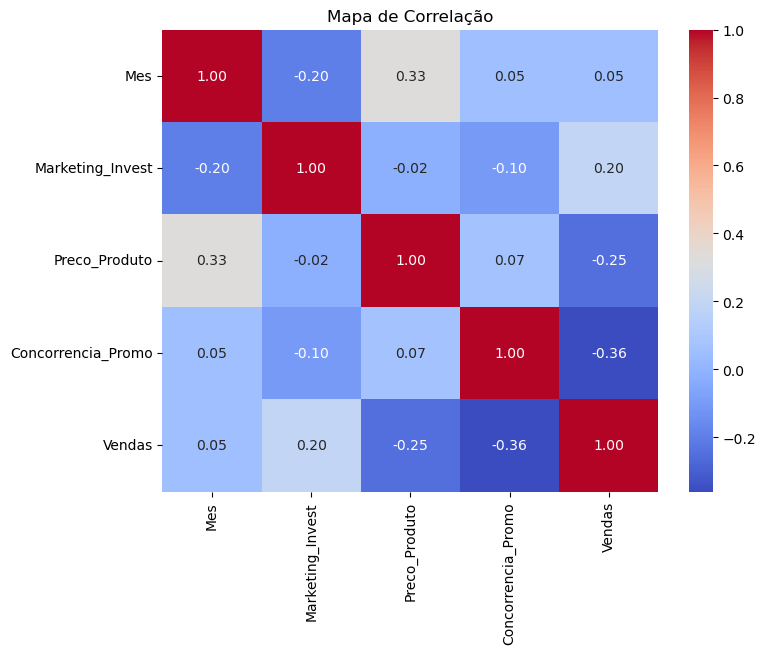

In [9]:
# Visualizar a correlação entre as variáveis

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm',fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

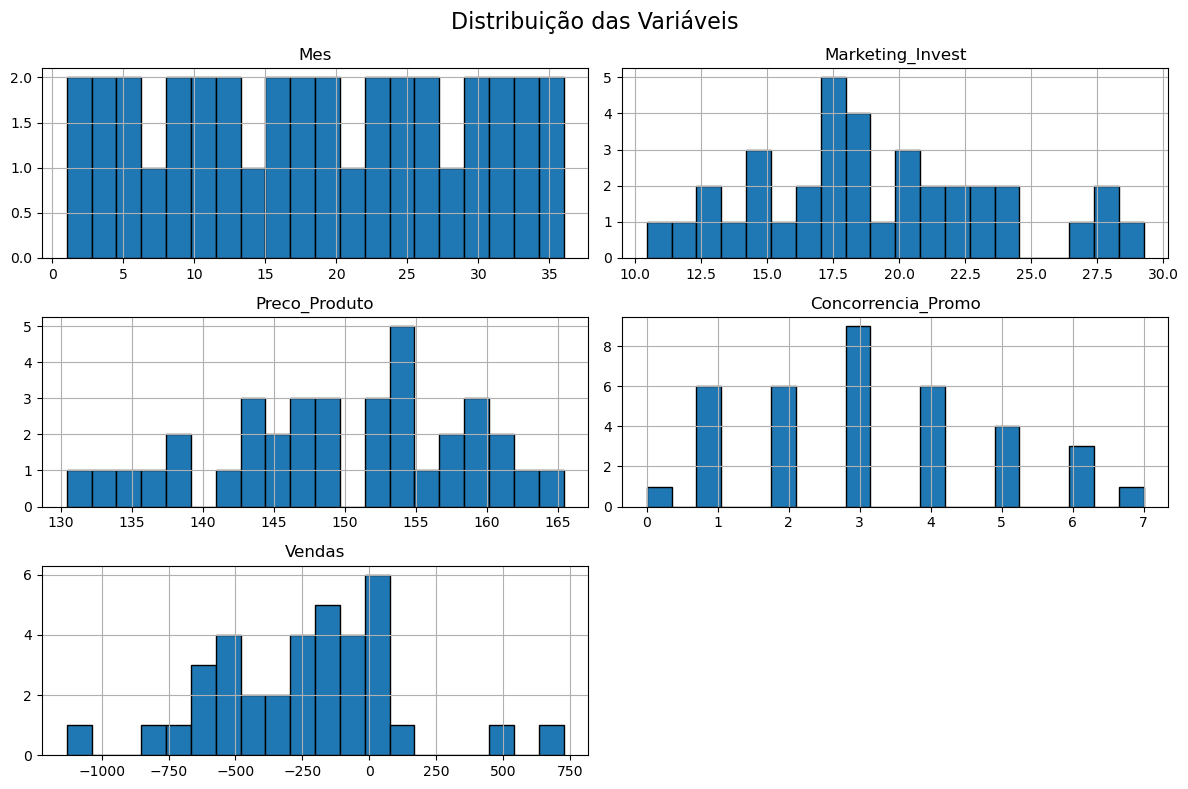

In [10]:
# Distribuição de cada variável
df.hist(bins=20, figsize=(12,8), edgecolor = 'black')
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

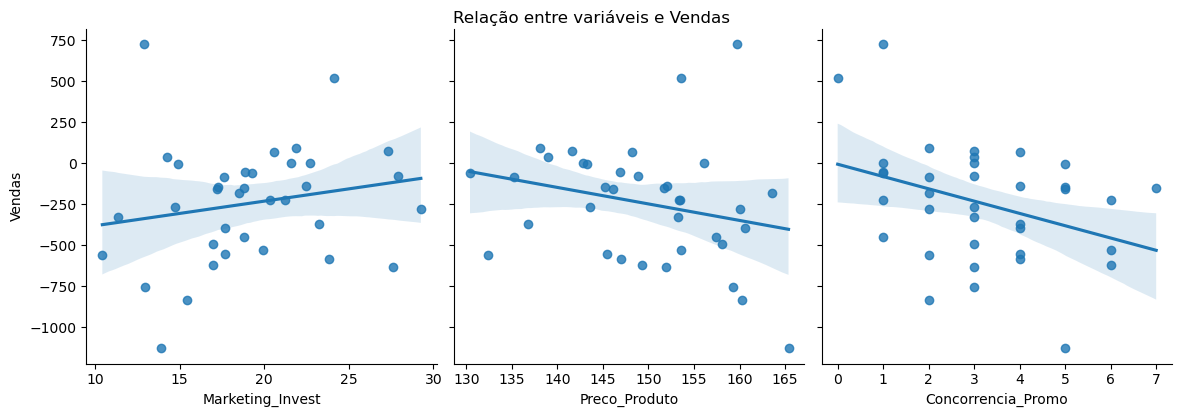

In [11]:
#  Gráficos de dispersão entre variáveis independentes e a variável dependente (vendas)
sns.pairplot(df, x_vars=['Marketing_Invest','Preco_Produto','Concorrencia_Promo'],y_vars='Vendas',height=4, aspect=1, kind='reg')
plt.suptitle("Relação entre variáveis e Vendas", y=1.02)
plt.show()

#  Preparação dos Dados para Modelagem

🎯 Objetivos:

* Separar os dados em variáveis independentes (X) e variável dependente (y)

* Dividir em conjunto de treino e teste

* Normalizar ou padronizar

* Treinar o modelo de regressão linear

In [12]:
# Separar X e y
# X: variáveis independentes
X = df[['Marketing_Invest', 'Preco_Produto', 'Concorrencia_Promo']]

# y: variável dependnte (o que queremos prever)
y = df['Vendas']

In [13]:
# Dividir os dados em treino e teste
# Usamos 70% para treino e 30% para teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [14]:
# Treinar o Modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

# Avaliação do Modelo

Agora que o modelo foi treinado, vamos:

1. Ver os coeficientes e a interceptação

2. Fazer previsões

3. Avaliar o desempenho com métricas de regressão:

* Coeficiente de Determinação (R²)

* Erro Absoluto Médio (MAE)

* Erro Quadrático Médio (MSE)

* Raiz do Erro Quadrático Médio (RMSE)

In [15]:
# Ver os coeficientes e interceptação
# Interceptação (valor base das vendas)
print("Interceptação:", modelo.intercept_)

# Coeficientes de cada variável 
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
})
print(coeficientes)

Interceptação: 970.5036965519919
             Variável  Coeficiente
0    Marketing_Invest     5.561837
1       Preco_Produto    -7.201492
2  Concorrencia_Promo   -69.625659


In [16]:
# Fazer previsões com o conjunto de teste
y_pred = modelo.predict(X_test)
y_pred

array([-491.32394247,  -63.97627903, -159.69593907, -427.78451736,
       -326.0292141 , -158.49370699,  -52.11980293,  -86.12592355,
        -44.31476658, -242.6712294 ,   -1.18137491])

In [17]:
#  Avaliar o modelo

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R² 
r2 = r2_score(y_test, y_pred)

# Mãe
mae = mean_absolute_error(y_test, y_pred)

# MSE e RMSE

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Exibir resultados
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.31
MAE: 218.03
MSE: 84297.67
RMSE: 290.34


# 🔎 Análise Geral

* O modelo captou algumas relações, mas ainda está com desempenho modesto.

* A variável que mais afeta negativamente as vendas é claramente a Concorrência_Promo.

* O investimento em marketing tem efeito positivo, mas menos impactante.



## Exportar os dados para Power BI

In [18]:
# Previsões feitas com X_test
df_resultado = X_test.copy()
df_resultado['Vendas_Previstas']= y_pred

# Juntando os valores reais para comparação
df_resultado['Vendas_Reais']= y_test.values

# Exportar para CSV
df_resultado.to_csv('previsoes_vendas.csv', index=False)

print("Arquivo exportado com sucesso!")

Arquivo exportado com sucesso!
